# Hands-On Exercise 6.3:
# Working with Naïve Bayes in Python
***

## Objectives

#### In this exercise, you will work with a naive bayes model on unstructured data in Python. This exercise allows you to predict a target variable from a number of predictor variables. The goal is to show you how a naive bayes model can be used to predict unknown values from a model trained on an existing data set.

### Overview

You will work on a data set called sms_spam that you will import from a csv file. You will:<br>
● Preprocess the unstructured data into a format suitable for naive bayes<br>
● Examine the predictor variables<br>
● Train a naive bayes model that can be used to make future predictions<br><br>

1. ❏ Import the **CountVectorizer** library from **sklearn.feature_extraction.text**

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

2. ❏ Import the **MultinomialNB** library from **sklearn.naive_bayes**

In [3]:
from sklearn.naive_bayes import MultinomialNB

3. ❏ Import the **pandas** library and use the **read_csv()** function to import the **sms_spam.csv** dataset

In [4]:
import pandas as pd

data = pd.read_csv("sms_spam.csv")
print(data.shape)
data.columns


(5574, 2)


Index(['type', 'text'], dtype='object')

4. ❏ Count the unique values in the target variable **type**

In [5]:
print(data.type.nunique())
print(data.type.unique())

2
['ham' 'spam']


5. ❏ Examine the proportions in the target variable

In [6]:
data.type.describe()

count     5574
unique       2
top        ham
freq      4827
Name: type, dtype: object

In [7]:
totalCount = data.type.shape[0]
hamCount = data[data['type'] == 'ham'].shape[0]
spamCount = data[data['type'] == 'spam'].shape[0]
print(totalCount)
print(hamCount)
print(spamCount)

propHam = hamCount/totalCount
propSpam = spamCount/totalCount
print(propHam)
print(propSpam)

5574
4827
747
0.8659849300322928
0.1340150699677072


In [8]:
#Faster way!
data['type'].value_counts() / len(data['type'])

ham     0.865985
spam    0.134015
Name: type, dtype: float64

6. ❏ Separate the **text** variable into a dataframe called **Pred**, and the **type** variable into a dataframe called **target**

In [9]:
Pred = data['text']
target = data['type']

7. ❏ Split the dataset into training and test datasets using the **train_test_split()** function<br><br>
*Hint: train_test_split will need to be imported from the sklearn.model_selection library*

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Pred, target, test_size=0.1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5016,)
(558,)
(5016,)
(558,)


8. ❏ Use the **CountVectorizer()** and **fit_transform()** functions to produce a Term Document Matrix

In [11]:
cv = CountVectorizer()
X_train_termDocMat = cv.fit_transform(X_train)
X_train_termDocMat.shape

(5016, 8205)

9. ❏ Assign the target values from the training dataset into a variable called **targets**

In [12]:
targets_train = y_train

10. ❏ Train the Naive Bayes model with the **MultinomialNB()** function using the Term Document Matrix and the **targets** variable

In [13]:
clf = MultinomialNB()
clf.fit(X=X_train_termDocMat, y=targets_train)
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

11. ❏ Vectorize the predictor data in the test dataset into token counts<br><br>
*Hint: Use the initialized CountVectorizer() function from step 8*

In [14]:
X_test_termDocMat = cv.transform(X_test)
X_train_termDocMat.shape

(5016, 8205)

12. ❏ Use the trained model to make predictions for the vectorized test dataset, and display them

In [15]:
y_pred = clf.predict(X_test_termDocMat)
y_pred

array(['ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       

13. ❏ Evaluate the model using the **classification_report()** function<br><br>
*Hint: This will need to be imported from sklearn.metrics*

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       491
        spam       0.97      0.93      0.95        67

    accuracy                           0.99       558
   macro avg       0.98      0.96      0.97       558
weighted avg       0.99      0.99      0.99       558



14. ❏ Evaluate the model using the **confusion_matrix()** function<br><br>
*Hint: This will need to be imported from sklearn.metrics*

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[489,   2],
       [  5,  62]], dtype=int64)

## <center>**Congratulations! You have completed the exercise.**</center>

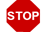

# <center>**This is the end of the exercise.**</center>